In [2]:
import os
import sys
import json
import bilby
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import utils
%load_ext autoreload
%autoreload 2

In [226]:
# from utils.corner2d import (
#     plot_corner2d, plot_hist2d, 
#     plot_square_minus_circle_noedge,
#     plot_theories_z12, plot_theories_spectral,
#     annotate_theories_z12, annotate_theories_spectral,
#     get_lines_for_legend,
# )

# def plot_deviation_example_z12(
#         z1_data, z2_data, zmax=1.,
#         z1_range=None, z2_range=None, 
#         z1_truth=None, z2_truth=None,
#         z1_label=r'$z_1$', z2_label=r'$z_2$', 
#         bins=30, levels=[0.5,0.9], quantiles=[0.05,0.95],
#         label='NPE', color='C0', truth_color='black', shade_color='lightgray', 
#         ppe_grid_thetas=[], ppe_grid_indices=[], 
#         ppe_result_cis=[], ppe_result_indices=[], ppe_annotation_indices=[],
#         ppe_label='PPE', ppe_color='C1', grid_color='gray', annotation_anchor=1., 
#         fig=None, subplots_ratio=1., subplots_space=None):

#     fig = plot_corner2d(
#             z1_data, z2_data, 
#             x_truth=z1_truth, y_truth=z2_truth,
#             x_range=z1_range, y_range=z2_range,
#             x_label=z1_label, y_label=z2_label,
#             bins=bins, levels=levels, quantiles=quantiles,
#             fig=fig, subplots_ratio=subplots_ratio, subplots_space=subplots_space,
#             color=color, truth_color=truth_color)
#     fig.axes[2].axhline(0., color=truth_color, linestyle='dashed')
#     fig.axes[2].axvline(0., color=truth_color, linestyle='dashed')
#     fig.axes[3].axhline(0., color=truth_color, linestyle='dashed')
#     fig.axes[0].axvline(0., color=truth_color, linestyle='dashed')
#     xlim = fig.axes[2].get_xlim()
#     ylim = fig.axes[2].get_ylim()
#     xcent = 0.5 * (xlim[1]+xlim[0])
#     ycent = 0.5 * (ylim[1]+ylim[0])
#     width = max(xlim[1]-xlim[0], ylim[1]-ylim[0])
#     xlim = xcent-width/2, xcent+width/2
#     ylim = ycent-width/2, ycent+width/2
#     fig.axes[2].set_xlim(xlim)
#     fig.axes[2].set_ylim(ylim)
#     fig.axes[0].set_xlim(xlim)
#     fig.axes[3].set_ylim(ylim)
    
#     ppe_grid_thetas = np.asarray(ppe_grid_thetas)
#     mask_result = [(b in set(ppe_result_indices)) for b in ppe_grid_indices]
#     mask_annotation = [(b in set(ppe_annotation_indices)) for b in ppe_grid_indices]
#     plot_theories_z12(
#             ppe_grid_thetas, 
#             ax=fig.axes[2], color=grid_color, linestyle='dotted')
#     plot_theories_z12(
#             ppe_grid_thetas[mask_result], ranges=ppe_result_cis, 
#             ax=fig.axes[2], color=ppe_color, linewidth=1.5*plt.rcParams['lines.linewidth'])
#     plot_square_minus_circle_noedge(
#             ax=fig.axes[2], width=zmax*4., ratio=0.5, color=shade_color, zorder=2)
#     annotate_theories_z12(
#             ppe_grid_thetas[mask_annotation], 
#             ppe_grid_indices[mask_annotation], 
#             label_transformer=get_pn_label_from_b,
#             ax=fig.axes[2], anchors=annotation_anchor, va='baseline', ha='right',
#             fontsize=plt.rcParams['legend.fontsize'])
    
#     lines = get_lines_for_legend(colors=[color, ppe_color])
#     fig.axes[1].legend(lines, [label, ppe_label], loc='center')
    
#     return fig


# def plot_deviation_example_spectral(
#         za_data, zb_data, 
#         za_range=None, zb_range=None,
#         za_truth=None, zb_truth=None,
#         za_label=r'$\varphi$', zb_label=r'$z_b$', 
#         bins=30, levels=[0.5,0.9], quantiles=[0.05,0.95],
#         label='NPE', color='C0', truth_color='black', shade_color='lightgray', 
#         ppe_grid_angs=[], ppe_grid_indices=[], 
#         ppe_result_cis=[], ppe_result_indices=[], ppe_annotation_indices=[],
#         ppe_label='PPE', ppe_color='C1', grid_color='gray', annotation_anchor=1., 
#         fig=None, subplots_ratio=1., subplots_space=None):

#     fig = plot_corner2d(
#             za_data, zb_data, 
#             x_truth=za_truth, y_truth=zb_truth,
#             x_range=za_range, y_range=zb_range,
#             x_label=za_label, y_label=zb_label,
#             bins=bins, levels=levels, quantiles=quantiles,
#             fig=fig, subplots_ratio=subplots_ratio, subplots_space=subplots_space,
#             color=color, truth_color=truth_color)
#     fig.axes[2].axhline(0., color=truth_color, linestyle='dashed')
#     fig.axes[3].axhline(0., color=truth_color, linestyle='dashed')
    
#     ppe_grid_angs = np.asarray(ppe_grid_angs)
#     mask_result = [(b in set(ppe_result_indices)) for b in ppe_grid_indices]
#     mask_annotation = [(b in set(ppe_annotation_indices)) for b in ppe_grid_indices]
#     plot_theories_spectral(
#             ppe_grid_angs, 
#             ax=fig.axes[2], color=grid_color, linestyle='dotted')
#     plot_theories_spectral(
#             ppe_grid_angs, 
#             ax=fig.axes[0], color=grid_color, linestyle='dotted')
#     plot_theories_spectral(
#             ppe_grid_angs[mask_result], ranges=ppe_result_cis, 
#             ax=fig.axes[2], color=ppe_color, linewidth=1.5*plt.rcParams['lines.linewidth'])
#     annotate_theories_spectral(
#             ppe_grid_angs[mask_annotation], 
#             ppe_grid_indices[mask_annotation],
#             label_transformer=get_pn_label_from_b,
#             ax=fig.axes[2], anchors=annotation_anchor, va='baseline', ha='right',
#             fontsize=plt.rcParams['legend.fontsize'])
#     ang_min = mask_annotation
    
#     lines = get_lines_for_legend(colors=[color, ppe_color])
#     fig.axes[1].legend(lines, [label, ppe_label], loc='center')
    
#     return fig


# def get_pn_label_from_b(b):
#     twice_pn = int(b) + 5
#     if twice_pn % 2:
#         label = f'${twice_pn/2:0.1f}$PN'
#     else:
#         label = f'${twice_pn//2:d}$PN'
#     return label

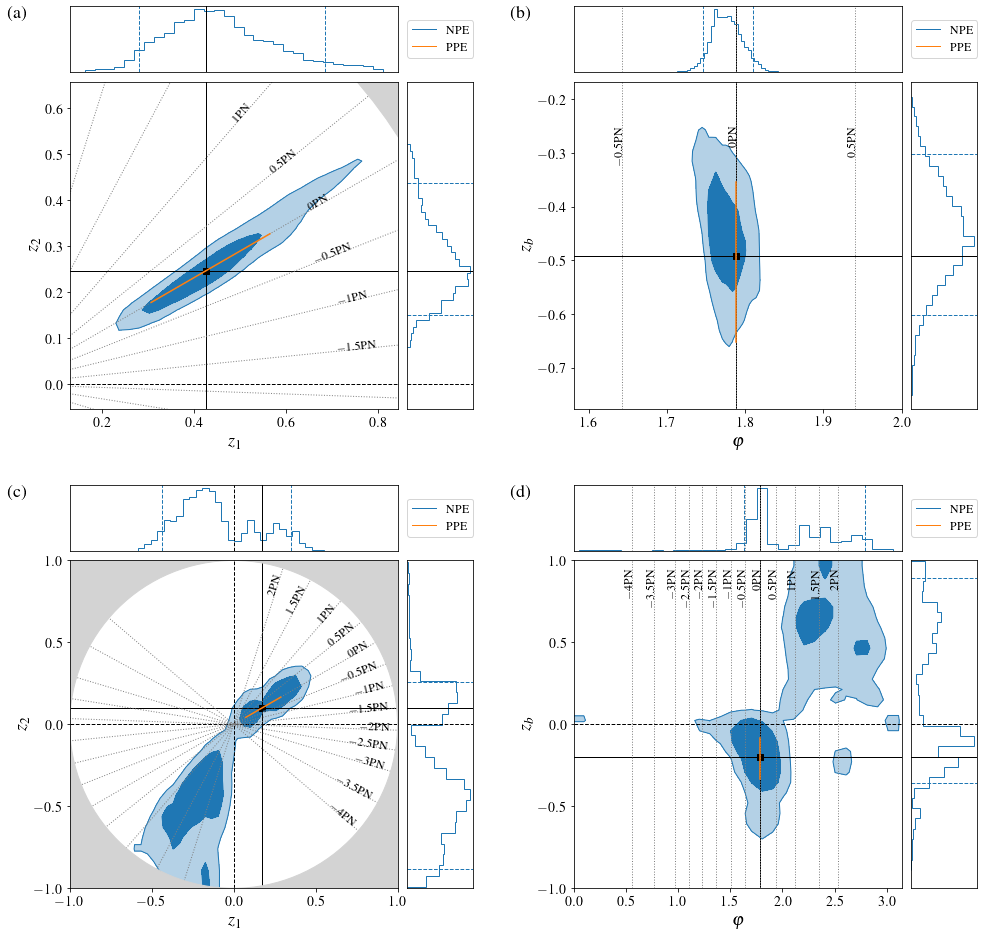

In [227]:
# theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
# root_posteriors = "../data/bilby_results/posteriors/"
# root_injections = "../data/bilby_results/injections/"

# plt.style.use('publication.mplstyle')
# fig = plt.figure(figsize=(
#         utils.TEXT_WIDTH_PRD_DOUBLE*2,
#         utils.TEXT_WIDTH_PRD_DOUBLE*2))
# subfigs = fig.subfigures(2, 2)

# # ======================================

# run_name = "mtot35_bn5_0p5"
# post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_ppe.csv"), index_col=0)
# with open(os.path.join(root_injections, run_name+"_ppe.json"), 'r') as f:
#     inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
    
# sf = subfigs[0,0]
# post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
# plot_deviation_example_z12(
#         post['z_1'].values, post['z_2'].values,
#         z1_range=0.995, z2_range=0.995, bins=30,
#         z1_truth=inj['z_1'], z2_truth=inj['z_2'],
#         ppe_grid_thetas=theory_angles['z_theta'].values, 
#         ppe_grid_indices=theory_angles['b'].values, 
#         ppe_result_cis=[np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])],
#         ppe_result_indices=[-5], ppe_annotation_indices=[-8,-7,-6,-5,-4,-3],
#         fig=sf, subplots_ratio=5., subplots_space=0.05, annotation_anchor=-0.8)

# sf = subfigs[0,1]
# post = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)
# plot_deviation_example_spectral(
#         post['z_ang'].values, post['z_bilat'].values,
#         za_range=0.995, zb_range=0.995, bins=30,
#         za_truth=inj['z_ang'], zb_truth=inj['z_bilat'],
#         ppe_grid_angs=theory_angles['z_ang'].values, 
#         ppe_grid_indices=theory_angles['b'].values, 
#         ppe_result_cis=[np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])],
#         ppe_result_indices=[-5], ppe_annotation_indices=[-6,-5,-4],
#         fig=sf, subplots_ratio=5., subplots_space=0.05, annotation_anchor=-0.25)
# sf.axes[2].set_xlim(1.58,2.)
# sf.axes[0].set_xlim(sf.axes[2].get_xlim())

# # ======================================

# run_name = "mtot35_bn5_0p2"
# post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_ppe.csv"), index_col=0)
# with open(os.path.join(root_injections, run_name+"_ppe.json"), 'r') as f:
#     inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
    
# sf = subfigs[1,0]
# post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
# plot_deviation_example_z12(
#         post['z_1'].values, post['z_2'].values, bins=30,
#         z1_truth=inj['z_1'], z2_truth=inj['z_2'],
#         ppe_grid_thetas=theory_angles['z_theta'].values, 
#         ppe_grid_indices=theory_angles['b'].values, 
#         ppe_result_cis=[np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])],
#         ppe_result_indices=[-5], ppe_annotation_indices=range(-13,0),
#         fig=sf, subplots_ratio=5., subplots_space=0.05, annotation_anchor=-0.95)
# sf.axes[2].set_xlim(-1.,1.)
# sf.axes[2].set_ylim(-1.,1.)
# sf.axes[0].set_xlim(sf.axes[2].get_xlim())
# sf.axes[3].set_ylim(sf.axes[2].get_ylim())
# sf.axes[2].set_yticks(sf.axes[2].get_xticks())

# sf = subfigs[1,1]
# post = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)
# plot_deviation_example_spectral(
#         post['z_ang'].values, post['z_bilat'].values, 
#         za_range=0.995, bins=30, 
#         za_truth=inj['z_ang'], zb_truth=inj['z_bilat'],
#         ppe_grid_angs=theory_angles['z_ang'].values, 
#         ppe_grid_indices=theory_angles['b'].values, 
#         ppe_result_cis=[np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])],
#         ppe_result_indices=[-5], ppe_annotation_indices=range(-13,0),
#         fig=sf, subplots_ratio=5., subplots_space=0.05, annotation_anchor=0.95)
# sf.axes[2].set_xlim(0.,np.pi)
# sf.axes[2].set_ylim(-1.,1.)
# sf.axes[0].set_xlim(sf.axes[2].get_xlim())
# sf.axes[3].set_ylim(sf.axes[2].get_ylim())
# sf.axes[2].set_yticks(subfigs[1,0].axes[2].get_yticks())

# # ======================================

# subfigs[0, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
# subfigs[0, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
# subfigs[1, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
# subfigs[1, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)

# axes_to_label = [sf.axes[0] for sf in subfigs.flat]
# axes_label_pos = [(-0.13,1.)] * len(axes_to_label)
# for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
#     axlabel = f'({chr(97+i)})'
#     ax.text(pos[0], pos[1], axlabel, 
#             transform=ax.transAxes, 
#             fontweight='bold', fontsize=18,
#             va='top', ha='right')

# # fig.savefig('../figs/deviation_examples.pdf')

In [6]:
from utils.corner2d_new import CornerZ12, CornerZSpectral, get_lines_for_legend

def plot_z12(
        post, inj, 
        z1_range=None, z2_range=None,
        ppe_grid_indices=[], ppe_grid_angles=[], 
        ppe_result_indices=[], ppe_result_cis=[],
        ppe_annotation_indices=[], ppe_annotation_anchors=0.,
        fig=None):
    cp = CornerZ12(fig, grid_indices=ppe_grid_indices, grid_angles=ppe_grid_angles)
    cp.plot(post['z_1'].values, post['z_2'].values, 
            x_range=z1_range, y_range=z2_range, color='C0')
    cp.mark(inj['z_1'], inj['z_2'], color='black',
            marker='^', linestyle='', markersize=3.*plt.rcParams['lines.markersize'])
    cp.add_ppe_results(
            ppe_result_indices, ppe_result_cis, color='C1',
            linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.rescale_axes()
#     cp.mark(0., 0., color='black', 
#             marker=None, linestyle='dashdot')
    cp.add_shade(color='lightgray', zorder=2)
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            ppe_annotation_indices, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    return cp


def plot_zspectral(
        post, inj, 
        za_range=None, zb_range=None,
        ppe_grid_indices=[], ppe_grid_angles=[], 
        ppe_result_indices=[], ppe_result_cis=[],
        ppe_annotation_indices=[], ppe_annotation_anchors=0.,
        fig=None):
    cp = CornerZSpectral(fig, grid_indices=ppe_grid_indices, grid_angles=ppe_grid_angles)
    cp.plot(post['z_ang'].values, post['z_bilat'].values, 
            x_range=za_range, y_range=zb_range, color='C0')
    cp.mark(inj['z_ang'], inj['z_bilat'], color='black',
            marker='^', linestyle='', markersize=3.*plt.rcParams['lines.markersize'])
    cp.add_ppe_results(
            ppe_result_indices, ppe_result_cis, color='C1',
            linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.rescale_axes()
#     cp.mark(y=0., color='black', 
#             marker=None, linestyle='dashdot')
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            ppe_annotation_indices, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    cp.axes[2].axhline(0., color='gray', linestyle='dotted')
    cp.axes[3].axhline(0., color='gray', linestyle='dotted')
    return cp

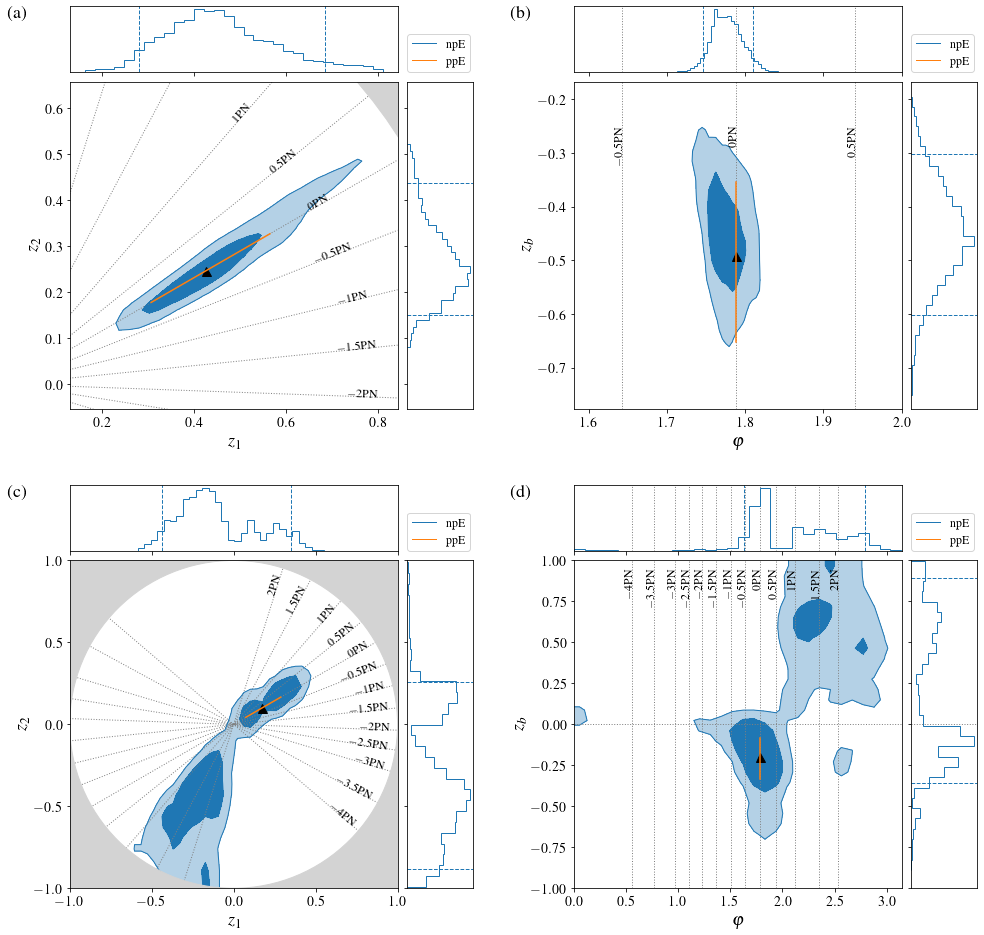

In [8]:
plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE*2,
        utils.TEXT_WIDTH_PRD_DOUBLE*2))
subfigs = fig.subfigures(2, 2)

theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
root_posteriors = "../data/bilby_results/posteriors/"
root_injections = "../data/bilby_results/injections/"

labels = ['npE', 'ppE']
lines = get_lines_for_legend(colors=['C0', 'C1'])

run_name = "mtot35_bn5_0p5"
post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_ppe.csv"), index_col=0)
with open(os.path.join(root_injections, run_name+"_ppe.json"), 'r') as f:
    inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))

post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
cp = plot_z12(
        post, inj, z1_range=0.995, z2_range=0.995,
        ppe_grid_indices=theory_angles['b'].values, ppe_grid_angles=theory_angles['z_theta'].values,
        ppe_result_indices=[-5], ppe_result_cis=[np.quantile(post_ppe['z_bilat'], [0.05,0.95])],
        ppe_annotation_indices=[-9,-8,-7,-6,-5,-4,-3], ppe_annotation_anchors=-0.8,
        fig=subfigs[0,0])
# cp.axes[2].legend(lines, labels, loc='upper left')
cp.axes[1].legend(lines, labels, loc=(0,0))
post = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)
cp = plot_zspectral(
        post, inj, za_range=0.995, zb_range=0.995,
        ppe_grid_indices=theory_angles['b'].values, ppe_grid_angles=theory_angles['z_ang'].values,
        ppe_result_indices=[-5], ppe_result_cis=[np.quantile(post_ppe['z_bilat'], [0.05,0.95])],
        ppe_annotation_indices=[-6,-5,-4], ppe_annotation_anchors=-0.25,
        fig=subfigs[0,1])
cp.set_xlim(1.58,2.)
cp.align_axes()
# cp.axes[2].legend(lines, labels, loc='lower left')
cp.axes[1].legend(lines, labels, loc=(0,0))


run_name = "mtot35_bn5_0p2"
post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_ppe.csv"), index_col=0)
with open(os.path.join(root_injections, run_name+"_ppe.json"), 'r') as f:
    inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))

post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
cp = plot_z12(
        post, inj, 
        ppe_grid_indices=theory_angles['b'].values, ppe_grid_angles=theory_angles['z_theta'].values,
        ppe_result_indices=[-5], ppe_result_cis=[np.quantile(post_ppe['z_bilat'], [0.05,0.95])],
        ppe_annotation_indices=None, ppe_annotation_anchors=-0.95,
        fig=subfigs[1,0])
cp.set_yticks(cp.axes[2].get_xticks())
cp.set_xlim(-1., 1.)
cp.set_ylim(-1., 1.)
# cp.axes[2].legend(lines, labels, loc='upper left')
cp.axes[1].legend(lines, labels, loc=(0,0))
post = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)
cp = plot_zspectral(
        post, inj,
        ppe_grid_indices=theory_angles['b'].values, ppe_grid_angles=theory_angles['z_ang'].values,
        ppe_result_indices=[-5], ppe_result_cis=[np.quantile(post_ppe['z_bilat'], [0.05,0.95])],
        ppe_annotation_indices=None, ppe_annotation_anchors=0.95,
        fig=subfigs[1,1])
cp.set_xlim(0., np.pi)
cp.set_ylim(-1., 1.)
# cp.axes[2].legend(lines, labels, loc='lower left')
cp.axes[1].legend(lines, labels, loc=(0,0))


subfigs[0, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[0, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[1, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
subfigs[1, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)

axes_to_label = [sf.axes[0] for sf in subfigs.flat]
axes_label_pos = [(-0.13,1.)] * len(axes_to_label)
for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
    axlabel = f'({chr(97+i)})'
    ax.text(pos[0], pos[1], axlabel, 
            transform=ax.transAxes, 
            fontweight='bold', fontsize=18,
            va='top', ha='right')
    
# fig.savefig('../figs/deviation_examples.pdf')

## For slides

In [4]:
from utils.corner2d_new import CornerZ12, CornerZSpectral, get_lines_for_legend, plot_hist

def plot_z12_slides(
        post, inj, show_npe=True, show_ppe=True,
        z1_range=None, z2_range=None,
        ppe_grid_indices=[], ppe_grid_angles=[], 
        ppe_result_indices=[], ppe_result_cis=[],
        ppe_annotation_indices=[], ppe_annotation_anchors=0.,
        fig=None):
    cp = CornerZ12(fig, grid_indices=ppe_grid_indices, grid_angles=ppe_grid_angles)
    if show_npe:
        cp.plot(post['z_1'].values, post['z_2'].values, 
                x_range=z1_range, y_range=z2_range, color='C0')
    cp.mark(inj['z_1'], inj['z_2'], color='black',
            marker='s', linestyle='-', markersize=2.*plt.rcParams['lines.markersize'])
    if show_ppe:
        cp.add_ppe_results(
                ppe_result_indices, ppe_result_cis, color='C1',
                linewidth=2.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.rescale_axes()
    cp.add_shade(color='lightgray', zorder=2)
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            ppe_annotation_indices, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    return cp

theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
root_posteriors = "../data/bilby_results/posteriors/"
root_injections = "../data/bilby_results/injections/"

run_name = "mtot35_bn5_0p5"
post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_ppe.csv"), index_col=0)
with open(os.path.join(root_injections, run_name+"_ppe.json"), 'r') as f:
    inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)

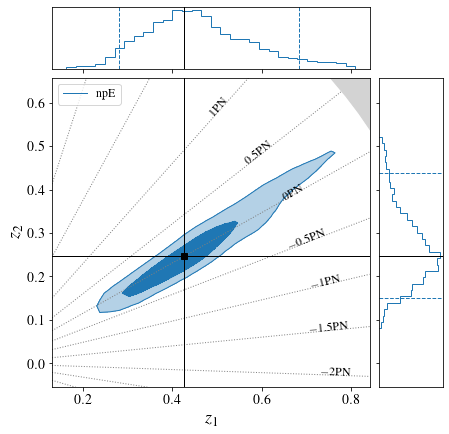

In [32]:
plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE))

labels = ['npE']
lines = get_lines_for_legend(colors=['C0'])
cp = plot_z12_slides(
        post, inj, show_ppe=False,
        z1_range=0.995, z2_range=0.995,
        ppe_grid_indices=theory_angles['b'].values, ppe_grid_angles=theory_angles['z_theta'].values,
        ppe_result_indices=[-5], ppe_result_cis=[np.quantile(post_ppe['z_bilat'], [0.05,0.95])],
        ppe_annotation_indices=[-9,-8,-7,-6,-5,-4,-3], ppe_annotation_anchors=-0.8,
        fig=fig)
cp.axes[2].legend(lines, labels, loc='upper left')

fig.savefig('../figs/slides/deviation_0pn_npe.pdf')

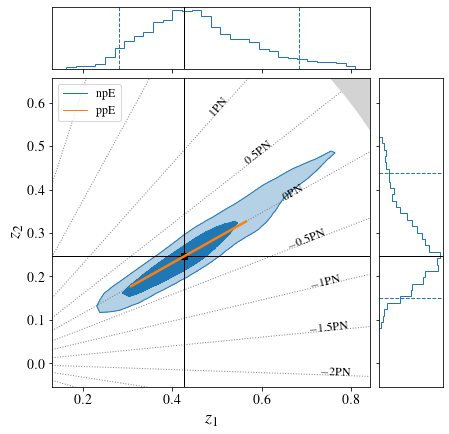

In [36]:
plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE))

labels = ['npE', 'ppE']
lines = get_lines_for_legend(colors=['C0', 'C1'])
cp = plot_z12_slides(
        post, inj, show_ppe=True,
        z1_range=0.995, z2_range=0.995,
        ppe_grid_indices=theory_angles['b'].values, ppe_grid_angles=theory_angles['z_theta'].values,
        ppe_result_indices=[-5], ppe_result_cis=[np.quantile(post_ppe['z_bilat'], [0.05,0.95])],
        ppe_annotation_indices=[-9,-8,-7,-6,-5,-4,-3], ppe_annotation_anchors=-0.8,
        fig=fig)
cp.axes[2].legend(lines, labels, loc='upper left')

fig.savefig('../figs/slides/deviation_0pn_npe_ppe.pdf', facecolor='white', edgecolor='white')

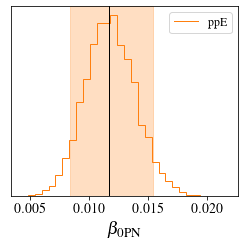

In [6]:
plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE*0.5,
        utils.TEXT_WIDTH_PRD_DOUBLE*0.5))

ax = fig.subplots(1,1)
# ax = plot_hist(post_ppe['beta'], color='C1', ax=ax)
ax.hist(post_ppe['beta'], bins=30, color='C1', histtype='step')
ax.axvline(inj['beta'], color='black')
l, r = np.quantile(post_ppe['beta'], [0.05,0.95])
ax.axvspan(l, r, color='C1', alpha=0.25)
ax.set_yticks([])
ax.set_xlabel(r'$\beta_\mathrm{0PN}$')

labels = ['ppE']
lines = get_lines_for_legend(colors=['C1'])
ax.legend(lines, labels, loc='upper right')

fig.tight_layout()
fig.savefig('../figs/slides/deviation_0pn_ppe.pdf')